In [1]:
using Pkg
Pkg.activate("/Users/ryansenne/Documents/Github/SSM/")
# Pkg.activate("/home/ryansenne/PycharmProjects/ssm_julia/")

  Activating project at `\Users\ryansenne\Documents\Github\SSM`


In [2]:
include("/Users/ryansenne/Documents/Github/SSM//src/SSM.jl")
# include("/home/ryansenne/PycharmProjects/ssm_julia/src/SSM.jl")
using Random
using .SSM
using Distributions
using Plots

In [ ]:
# generate synthetic data to test the logistic regression model
β = [0.5, 1]

n = 10000

X = randn(n)
X = hcat(ones(n), X)

p = 1 ./ (1 .+ exp.(-X * β))

Y = rand.(Bernoulli.(p))

logreg = SSM.BernoulliRegression()
fit!(logreg, reshape(X[:, 2], n, 1), Vector{Float64}(Y))

In [29]:
# Parameters
n = 100000

A = [0.9 0.1; 0.1 0.9]
B = [0.5 1; 1 0.5]

# Generate feature matrix X
X = randn(n)
X = hcat(ones(n), X)

# Initialize S and Y
Y = zeros(Float64, n)
S = zeros(Int, n)

for i in 1:n
    if i == 1
        S[i] = rand(Bernoulli(0.5)) + 1
    else
        S[i] = rand(Bernoulli(A[S[i - 1], 1])) + 1
    end
    
    # generate the observation
    p = 1 / (1 + exp(-X[i, :]' * B[S[i], :]))
    Y[i] = rand(Bernoulli(p))
end

In [31]:
logreg = SSM.BernoulliRegression()
dep = Y[S .== 0]
indep = reshape(X[S .== 0, 2], length(dep), 1)

fit!(logreg, indep, dep)

2-element Vector{Float64}:
 0.9891422475741625
 0.1615263756944516

In [17]:
dep

UndefVarError: UndefVarError: `dep` not defined

In [16]:
S

100000-element Vector{Float64}:
 1.0
 0.0
 1.0
 0.0
 1.0
 0.0
 1.0
 0.0
 1.0
 0.0
 ⋮
 1.0
 0.0
 1.0
 0.0
 1.0
 0.0
 1.0
 1.0
 0.0

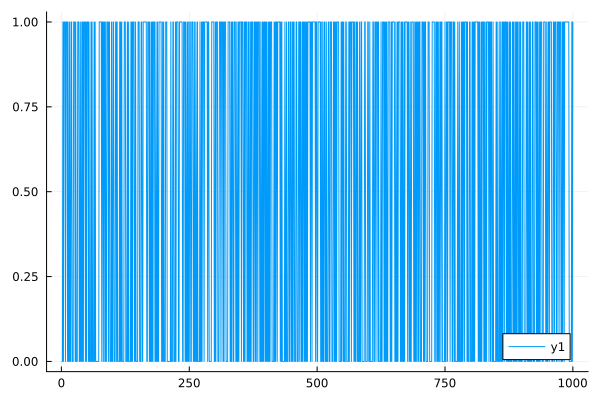

In [4]:
plot(Y)

In [32]:
switching_logreg = SSM.SwitchingBernoulliRegression(;K=2)
fit!(switching_logreg, reshape(X[:, 2], n, 1), Vector{Float64}(Y), 100)

Log-Likelihood at iter 1: -66266.16460618572
Log-Likelihood at iter 2: -58952.347300539244
Log-Likelihood at iter 3: -58790.77873267576
Log-Likelihood at iter 4: -58719.26620442212
Log-Likelihood at iter 5: -58675.71670720117
Log-Likelihood at iter 6: -58647.22596141085
Log-Likelihood at iter 7: -58627.728001074756
Log-Likelihood at iter 8: -58613.903057454765
Log-Likelihood at iter 9: -58603.81354378017
Log-Likelihood at iter 10: -58596.27123860564
Log-Likelihood at iter 11: -58590.51723760086
Log-Likelihood at iter 12: -58586.05005387671
Log-Likelihood at iter 13: -58582.52857632599
Log-Likelihood at iter 14: -58579.71493370193
Log-Likelihood at iter 15: -58577.43961800235
Log-Likelihood at iter 16: -58575.57952149084
Log-Likelihood at iter 17: -58574.04372108306
Log-Likelihood at iter 18: -58572.764052797014
Log-Likelihood at iter 19: -58571.688725982116
Log-Likelihood at iter 20: -58570.77791352067
Log-Likelihood at iter 21: -58570.00065207894
Log-Likelihood at iter 22: -58569.3326

101-element Vector{Float64}:
    -Inf
 -66266.16460618572
 -58952.347300539244
 -58790.77873267576
 -58719.26620442212
 -58675.71670720117
 -58647.22596141085
 -58627.728001074756
 -58613.903057454765
 -58603.81354378017
      ⋮
 -58561.35619161134
 -58561.30755724957
 -58561.25906192214
 -58561.21070021182
 -58561.16246683973
 -58561.11435693245
 -58561.06636603865
 -58561.01848993936
 -58560.97072439478

In [35]:
switching_logreg.B

2-element Vector{RegressionEmissions}:
 RegressionEmissions(Main.SSM.BernoulliRegression([0.34938646366579607, 1.0412991756032608], true))
 RegressionEmissions(Main.SSM.BernoulliRegression([1.0700900546723016, 0.5620678916982748], true))

In [7]:
# generate data from a "switching gaussian regression"
n = 100

A = [0.9 0.1; 0.1 0.9]
β₁, β₂ = [1.0, 2.0], [2.0, 1.0]
σ²₁, σ²₂ = 1.0, 0.5

X = randn(n, 1)
X = [ones(n) X]

Y = zeros(n)
S = zeros(n)

for i in 1:n
    if i == 1
        S[i] = rand(Bernoulli(0.5))
    else
        S[i] = rand(Bernoulli(A[Int(S[i-1]) + 1, 1]) )
    end
    if S[i] == 0
        Y[i] = X[i, :]'*β₁ + rand(Normal(0, sqrt(σ²₁)))
    else
        Y[i] = X[i, :]'*β₂ + rand(Normal(0, sqrt(σ²₂)))
    end
end

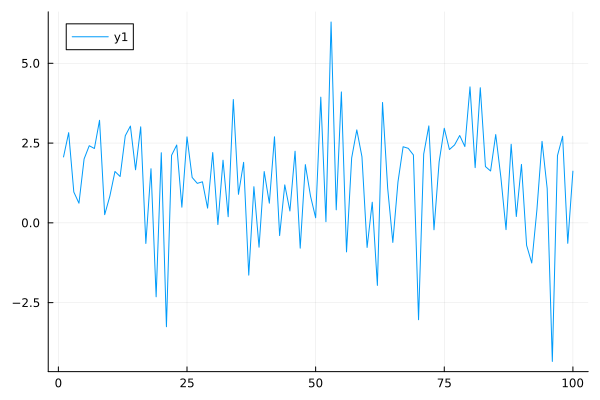

In [8]:
plot(Y)

In [9]:
model = SwitchingGaussianRegression(;K=2)

SwitchingGaussianRegression{Float64}([0.801670077316982 0.198329922683018; 0.11306721736744282 0.8869327826325571], RegressionEmissions[RegressionEmissions(Main.SSM.GaussianRegression(Float64[], 0.0, true)), RegressionEmissions(Main.SSM.GaussianRegression(Float64[], 0.0, true))], [0.4974633140358851, 0.5025366859641149], 2)

In [10]:
ll = SSM.fit!(model, reshape(X[:, 2], length(X[:, 2]), 1), Y, 1000, 1e-3, true)

Log-Likelihood at iter 1: -155.84305292205227
Log-Likelihood at iter 2: -145.80329745889375
Log-Likelihood at iter 3: -144.82663238077012
Log-Likelihood at iter 4: -144.1780578375232
Log-Likelihood at iter 5: -143.66137520886608
Log-Likelihood at iter 6: -143.12358766674802
Log-Likelihood at iter 7: -142.4784069262935
Log-Likelihood at iter 8: -141.69937121355503
Log-Likelihood at iter 9: -140.81874424628458
Log-Likelihood at iter 10: -139.9164473167097
Log-Likelihood at iter 11: -139.07848953944765
Log-Likelihood at iter 12: -138.3545280392043
Log-Likelihood at iter 13: -137.75208841755494
Log-Likelihood at iter 14: -137.2551013615863
Log-Likelihood at iter 15: -136.84150751620547
Log-Likelihood at iter 16: -136.49196738962087
Log-Likelihood at iter 17: -136.19184434957174
Log-Likelihood at iter 18: -135.93047103054298
Log-Likelihood at iter 19: -135.70006591187325
Log-Likelihood at iter 20: -135.4949873005465
Log-Likelihood at iter 21: -135.3113006711861
Log-Likelihood at iter 22: -1

40-element Vector{Float64}:
  -Inf
 -155.84305292205227
 -145.80329745889375
 -144.82663238077012
 -144.1780578375232
 -143.66137520886608
 -143.12358766674802
 -142.4784069262935
 -141.69937121355503
 -140.81874424628458
    ⋮
 -134.40716042400183
 -134.3890649769625
 -134.37681508857187
 -134.3687248962466
 -134.36349217135304
 -134.36016489368714
 -134.35807748809745
 -134.3567810756511
 -134.35598147747478